In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline

import matplotlib.pyplot as plt

import time
import functions
import datetime

# RQ1 

1) Plot the daily average for each month

    first of all:
    - understand data => what should we remove?
        - I think data which has different months/years
        
    

## notes and comments:

For this task, we didn't take in consider to get a smaller random sample from the csv files.

We found that one of the fastest way to get data is to extract from all the csv files only the columns that we need.

So we took only the columns that we needed, and than we filtered them by some criteria:

    - bla bla bla
    - bla bla bla


In [2]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

### Before starting

A summary of our situation. 

The **function below** shows some informations.

After seeing this summary I decided to drop out only the values with different dates and 

In [ ]:
#### "SHORT" ANALYSIS FUNCTION: SHOWS THE MAIN INFORMATIONS ABOUT THE CSV FILES
start = time.time()
for i in range(len(df_names)):
    
    df= pd.read_csv(df_names[i], parse_dates= ["tpep_pickup_datetime"])
    
    
    print ("mese %s" %str(i+1))
    print ("\tpayment_types     :",
           "[1:", str(df[df["payment_type"]== 1].shape[0]) + "]", "[2:", str(df[df["payment_type"]== 2].shape[0]) + "]",
           "[3:", str(df[df["payment_type"]== 3].shape[0]) + "]", "[4:", str(df[df["payment_type"]== 4].shape[0]) + "]",
           "[5:", str(df[df["payment_type"]== 5].shape[0]) + "]", "[6:", str(df[df["payment_type"]== 6].shape[0]) + "]"
          )
    
    
    
    print("\ttotal_amount == 0 : %i" %df[df["total_amount"] == 0].shape[0])
    print ("\tfare_amount == 0  :",df[df["fare_amount"]== 0].shape[0])
    print("\ttrip_distance == 0:",df[df["trip_distance"]== 0].shape[0])
    
    print("\tfare_amount == 0 and total_amount == 0 -->",
          df[(df["total_amount"] ==0) & (df["fare_amount"]==0)].shape[0])
    
    print("\tfare_amount == 0 or total_amount == 0 -->",
          df[(df["fare_amount"]==0) | (df["total_amount"] ==0)].shape[0])
    
    print("\tboth year and month different -->",
          df[(df['tpep_pickup_datetime'].dt.year != 2018) | (df['tpep_pickup_datetime'].dt.month != i+1)].shape[0] )
    
print("\n ----------> exec time: " + str(time.time()-start) + " s --------")

##  1.a) plot the daily average for each month

In [80]:
import time

start_time = time.time()
daily_average_lst = functions.compute_daily_average(df_names)
print("--- %s seconds ---" % (time.time() - start_time))



--- 110.40319895744324 seconds ---


In [68]:
daily_average_lst

[282393, 303065, 303950, 309963, 297330, 290212]

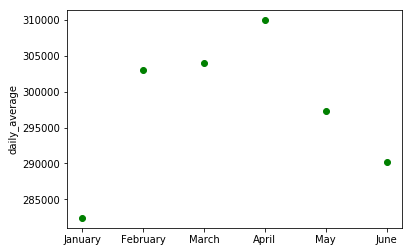

In [82]:
# plot daily_average_lst
months = ['January','February','March','April','May','June']
plt.xticks(range(1,7),months)
plt.ylabel("daily_average")
plt.plot(range(1,7), daily_average_lst, 'go')

## 1.b) For each borough, plot the daily average for each month

We've decided to put the results into a dictionary:
    - keys  = borought
    - value = list of the daily average for that specific borough

In [72]:
# init dictionary of borough's averages
borough_averages = {}

In [73]:
start = time.time()
borough_averages = functions.compute_borough_averages(df_names, taxi_zone_lookup)
print ("---->", time.time() - start )

----> 119.42627286911011


In [74]:
for key in borough_averages:
    print (key, borough_averages[key])

Bronx [237, 233, 331, 346, 349, 339]
Brooklyn [3229, 3391, 3960, 3963, 3956, 4092]
EWR [18, 17, 21, 23, 23, 22]
Manhattan [256831, 277264, 276223, 280803, 269202, 262453]
Queens [16961, 17262, 18178, 19838, 19660, 19110]
Staten Island [4, 3, 4, 4, 4, 4]
Unknown [5111, 4891, 5231, 4983, 4133, 4190]


In [75]:

months = ['January','February','March','April','May','June']

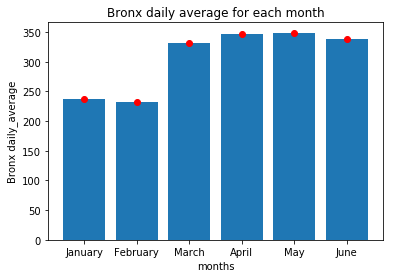

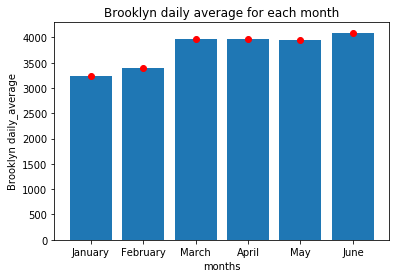

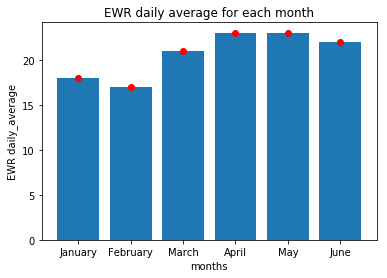

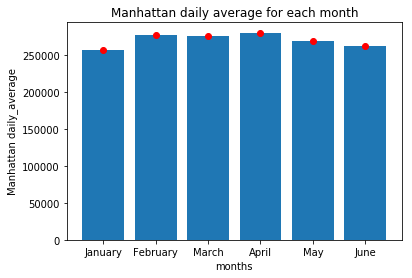

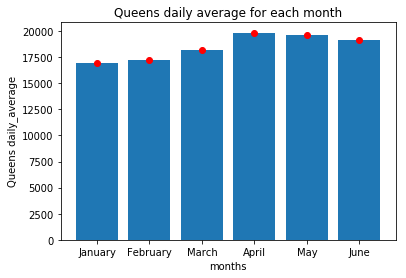

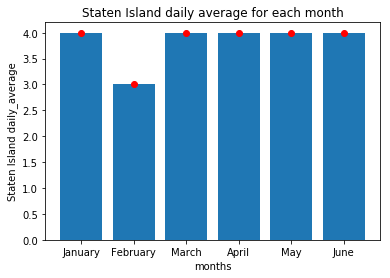

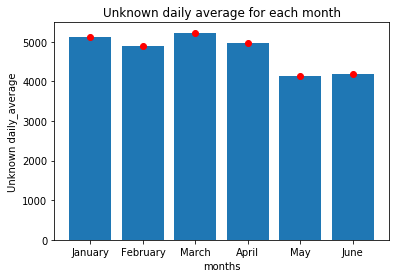

In [80]:

for key,value in borough_averages.items():
    plt.figure()
    plt.ylabel("%s daily_average" %str(key))
    plt.xlabel("months")
    plt.plot(months,value, 'ro')
    plt.bar(months, value)
    plt.title("%s daily average for each month" %str(key))